In [ ]:
Q). Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

In [ ]:
book.csv Dataset

In [ ]:
#import Libraries

In [28]:
!pip3 install mlxtend

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Read dataset
book= pd.read_csv('C:/Users/aabdu/Desktop/Association Rules Assignment/book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [31]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [ ]:
EDA

In [32]:
#Generating list of Purchased and Not Purchased 
zero = []
one= []

for i in book.columns:
    zero.append(list(book[i].value_counts())[0])
    one.append(list(book[i].value_counts())[1])

In [33]:
count_df = pd.DataFrame([zero,one],columns=book.copy().columns)
count_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
1,846,495,862,564,429,482,552,227,74,97,217


In [ ]:
#counting how many books are purchased

In [34]:
count_df.index = ['Not_Purchased','Purchased']
count_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
Not_Purchased,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
Purchased,846,495,862,564,429,482,552,227,74,97,217


In [35]:
print('Maximum purchased items:',count_df.idxmax(axis=1)[1],':',count_df.loc['Purchased'].max())
print("Minimum purchased item:" ,count_df.idxmax(axis=1)[0],':',count_df.loc['Not_Purchased'].max())

Maximum purchased items: CookBks : 862
Minimum purchased item: ItalAtlas : 1926


In [36]:
sorted_df = pd.DataFrame(count_df.sort_values(by =['Purchased'],axis=1, ascending=False).transpose())
sorted_df

,Not_Purchased,Purchased
CookBks,1138,862
ChildBks,1154,846
DoItYBks,1436,564
GeogBks,1448,552
YouthBks,1505,495
ArtBks,1518,482
RefBks,1571,429
ItalCook,1773,227
Florence,1783,217
ItalArt,1903,97


In [ ]:
Most purchased book isCookBks. While ItalAtlas is least Purchased book.

In [ ]:
#percentage of books purchsed

In [37]:
sorted_df['Purchased %']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df

,Not_Purchased,Purchased,Purchased %
CookBks,1138,862,0.177915
ChildBks,1154,846,0.174613
DoItYBks,1436,564,0.116409
GeogBks,1448,552,0.113932
YouthBks,1505,495,0.102167
ArtBks,1518,482,0.099484
RefBks,1571,429,0.088545
ItalCook,1773,227,0.046852
Florence,1783,217,0.044788
ItalArt,1903,97,0.020021


In [38]:
np.mean(sorted_df['Purchased %'])

0.0909090909090909

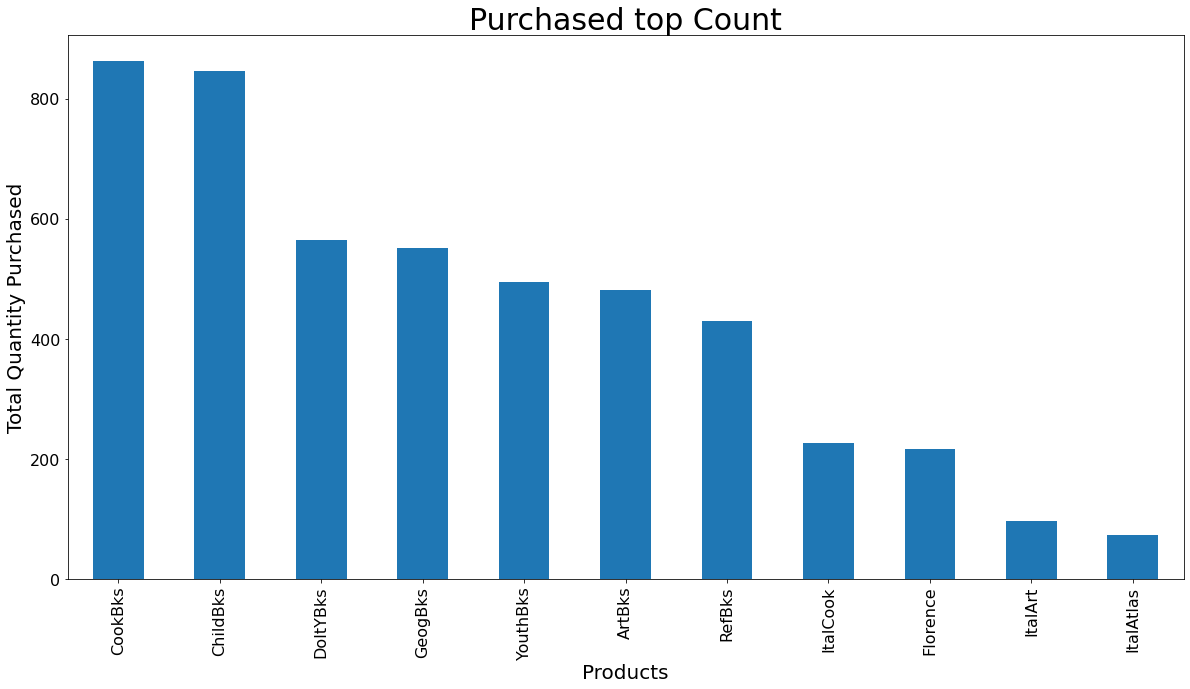

In [39]:
fig = plt.subplots(figsize=(20,10))

purchased = sorted_df.head(50).xs('Purchased' , axis=1)

purchased.plot(kind='bar', fontsize=16)

plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('Total Quantity Purchased', fontsize=20)
plt.show()

In [ ]:
Percentage of CookBks, ChildBks and DoltYBks is high

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(book, min_support=0.05,use_colnames=True, max_len= 3)

In [41]:
freq_items.shape

(76, 2)

In [42]:
freq_items.tail(10)

,support,itemsets
66,0.0585,"(ItalCook, DoItYBks, CookBks)"
67,0.0700,"(RefBks, ArtBks, CookBks)"
68,0.0890,"(RefBks, GeogBks, CookBks)"
69,0.1035,"(GeogBks, ArtBks, CookBks)"
70,0.0565,"(ItalCook, ArtBks, CookBks)"
71,0.0640,"(ItalCook, GeogBks, CookBks)"
72,0.0535,"(RefBks, DoItYBks, ArtBks)"
73,0.0585,"(RefBks, GeogBks, DoItYBks)"
74,0.0730,"(GeogBks, DoItYBks, ArtBks)"
75,0.0565,"(RefBks, GeogBks, ArtBks)"


In [ ]:
Building Association rules using confidence metrics

In [43]:
confidence_association=association_rules(freq_items,metric='confidence', min_threshold=0.2)

In [44]:
confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [45]:
confidence_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
269,"(DoItYBks, ArtBks)",(GeogBks),0.1235,0.2760,0.0730,0.591093,2.141642,0.038914,1.770574
270,(GeogBks),"(DoItYBks, ArtBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
271,(DoItYBks),"(GeogBks, ArtBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
272,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
273,"(RefBks, GeogBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
274,"(RefBks, ArtBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
275,"(GeogBks, ArtBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
276,(RefBks),"(GeogBks, ArtBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502
277,(GeogBks),"(RefBks, ArtBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866
278,(ArtBks),"(RefBks, GeogBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894


In [ ]:
Building Association rules using lift metrics

In [46]:
lift_association = association_rules(freq_items, metric='lift', min_threshold=1)

In [47]:
lift_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
284,"(DoItYBks, ArtBks)",(GeogBks),0.1235,0.2760,0.0730,0.591093,2.141642,0.038914,1.770574
285,(GeogBks),"(DoItYBks, ArtBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
286,(DoItYBks),"(GeogBks, ArtBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
287,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
288,"(RefBks, GeogBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
289,"(RefBks, ArtBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
290,"(GeogBks, ArtBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
291,(RefBks),"(GeogBks, ArtBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502
292,(GeogBks),"(RefBks, ArtBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866
293,(ArtBks),"(RefBks, GeogBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894


In [ ]:
Removing Redundancy

In [ ]:
Removing redundant sets

In [48]:
redundancy = lift_association.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


In [49]:
redundancy.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
289,"(ItalCook, CookBks)",(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
290,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
291,(DoItYBks),"(ItalCook, CookBks)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
292,"(ItalCook, GeogBks)",(ChildBks),0.0640,0.4230,0.0525,0.820312,1.939273,0.025428,3.211130
293,(ChildBks),"(ItalCook, GeogBks)",0.4230,0.0640,0.0525,0.124113,1.939273,0.025428,1.068632


In [ ]:
An leverage value of 0 indicates independence. Range will be [-1 1].
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [ ]:
Finding Unique sets

In [50]:
unique_rules = redundancy.iloc[::1]
unique_rules.shape

(294, 9)

In [51]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
5,(DoItYBks),"(ChildBks, CookBks)",0.282,0.256,0.1460,0.517730,2.022385,0.073808,1.542706
6,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
7,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
8,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
9,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


In [ ]:
ChildBks, CookBks and GeogBks, DoItYBks are bought together.

In [ ]:
Generated Rules analysis

In [52]:
#Rules sorted with respect to lift
top_sort = unique_rules[unique_rules['lift']>1.5]

In [53]:
top_scored = top_sort.sort_values(by='lift', ascending = False)
top_sort.reset_index(inplace=True)
top_sort  = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


In [ ]:
ChildBks, CookBks, GeogBks have a lift of >1.5

In [54]:
x = top_sort[['antecedents','consequents']]

In [ ]:
# top sorted Antecedents

In [55]:
item_list = [] 
for i in x.antecedents.to_list(): 
    for j in list(set(i)):
        item_list.append(j)

In [ ]:
# top sorted consequents

In [56]:
item_list = []
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [ ]:
#generating unique list of items (# without redundacy)

In [57]:
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    
    # convert the set to the list 
    unique_list = (list(list_set))
    
    top_items =[]
    for m in unique_list:
        top_items.append(m)
        
    print('top_items')

In [ ]:
Concluding top_items and the shuffled combination of top lift result

In [58]:
unique(item_list)

top_items


In [ ]:
Unique list of books that can be coupled together are listed above. We can use these items to group together to increase the sales. We can further analyze with different support, confidence values, and min_threshold to generate different sets.

In [ ]:
Trying different values of Support, Confidence, Max_len and Min_thershold

In [59]:
frequent_books_s=apriori(book,min_support=0.005,max_len=3,use_colnames=True)

In [60]:
#sorting with respect to support
frequent_books_s.sort_values('support',ascending=False,inplace=True)

In [61]:
#generating association rules
rules= association_rules(frequent_books_s,metric='lift',min_threshold=1)

In [62]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
5,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
6,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
7,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
8,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
9,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347


In [63]:
rules.sort_values('lift',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
745,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
744,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
354,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
351,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
565,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
560,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
923,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
922,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306


In [71]:
rules_r=rules.sort_values('lift', ascending =False)

In [ ]:
Min_support = 0.005, Max_len = 5, Lift, Min_threshold=1

In [72]:
frequent_books_2= apriori(book,min_support=0.005,max_len=5,use_colnames=True)
rule2=association_rules(frequent_books_2, metric='lift',min_threshold=1)

In [ ]:
Min_support = 0.005, Max_len = 4, Lift, Min_threshold=1

In [73]:
frequent_books_3 = apriori(book, min_support = 0.005, max_len = 4, use_colnames = True)
rules3 = association_rules(frequent_books_2, metric = "lift", min_threshold= 1)

In [ ]:
Min_support = 0.01, Max_len = 3, Lift, Min_threshold=1.5

In [74]:
frequent_books_4 = apriori(book, min_support = 0.01, max_len = 3, use_colnames = True)
rules4 = association_rules(frequent_books_4, metric = "lift", min_threshold= 1.5)

In [ ]:
Min_support = 0.05, Max_len = 3, Confidence, Min_threshold = 0.8

In [75]:
frequent_books_5 = apriori(book, min_support = 0.05, max_len = 3, use_colnames = True)
rules5 = association_rules(frequent_books_5, metric = "confidence", min_threshold= 0.8)

In [ ]:
Min_support = 0.1, Max_len = 3, Confidence, Min_threshold = 0.8¶

In [76]:
frequent_books_6 = apriori(book, min_support = 0.1, max_len = 3, use_colnames = True)
rules6 = association_rules(frequent_books_6, metric = "confidence", min_threshold= 0.8)

In [77]:
# Generating list for support and confidence

support=rules['support']
confidence=rules['confidence']

In [ ]:
Bar Plot

Text(0, 0.5, 'support')

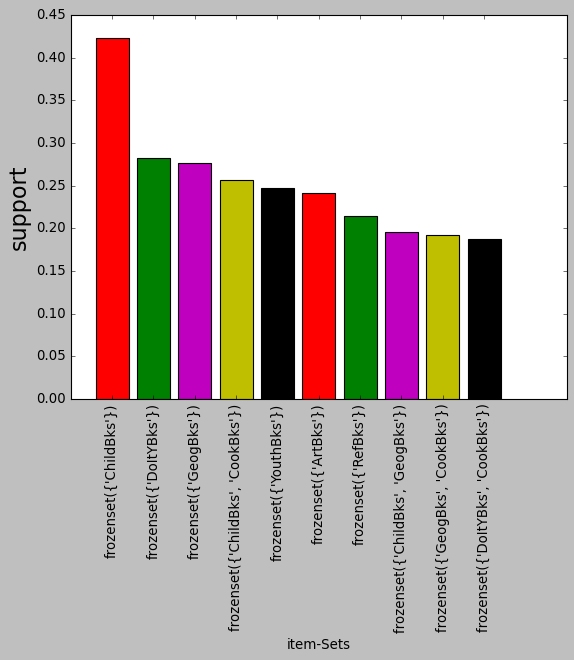

In [78]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_s.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_s.itemsets[1:11],rotation='vertical')
plt.xlabel('item-Sets')
plt.ylabel('support',fontsize=20)

Text(0, 0.5, 'Support')

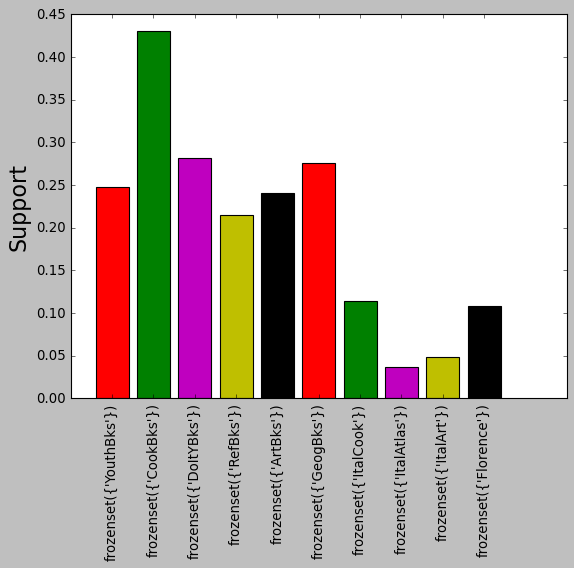

In [79]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_2.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_2.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

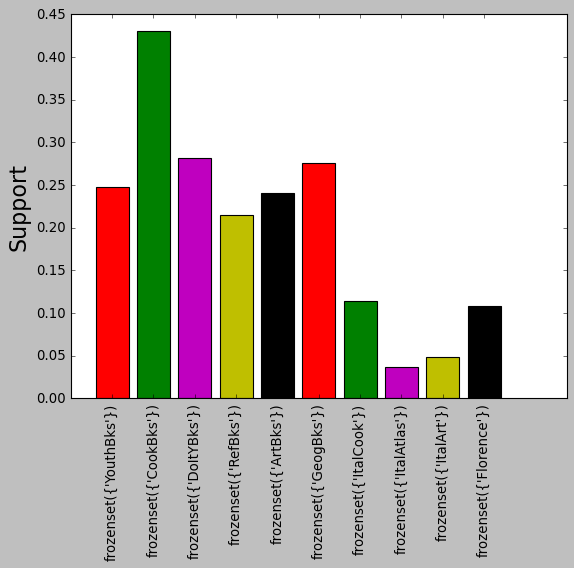

In [80]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_3.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_3.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

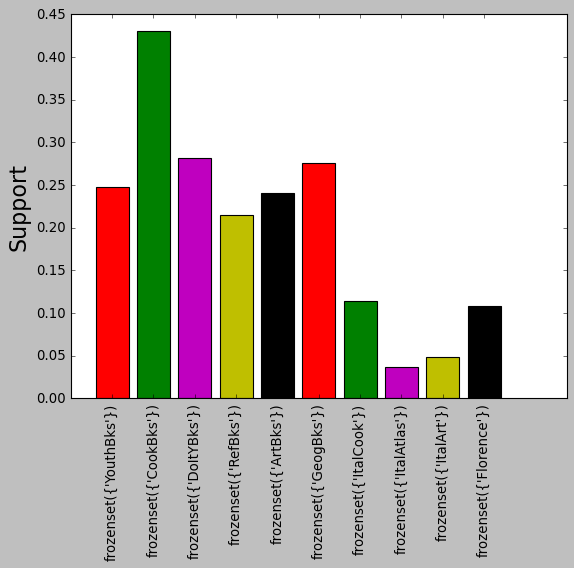

In [81]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_4.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_4.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

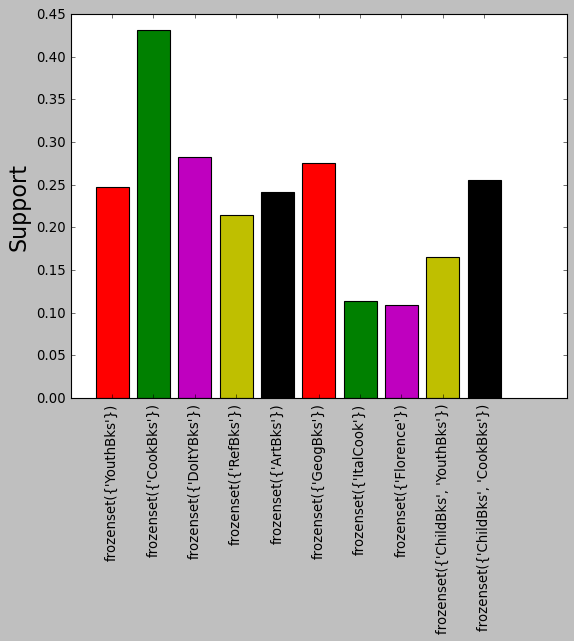

In [82]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_5.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_5.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

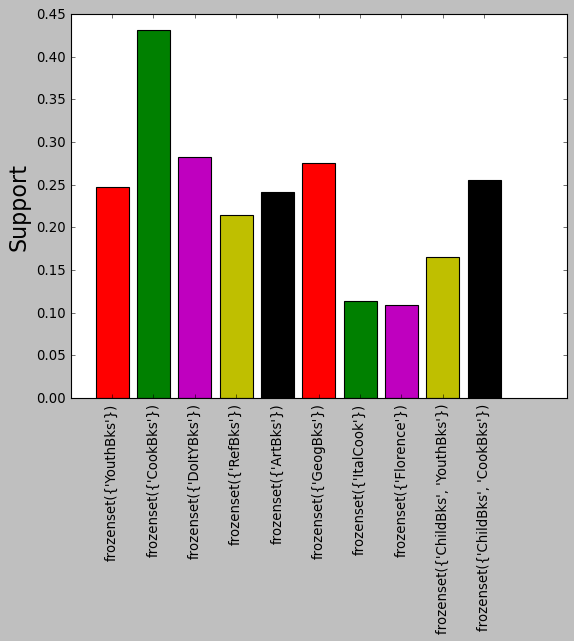

In [83]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_6.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_6.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

In [ ]:
Above plots shows the different number of sets we can produce with change in Support, confidence, Max_length and Min_thershold